## Hypothesis 4: Warmer regions have lesser number of COVID-19 cases
The sample countries have been classified as hot or cold considering the fact that our data and obervations are strictly from Jan 1,2020 till May 5, 2020 during which winter is observed in the northern hemisphere and summer is observed in the southern hemisphere. Hence, countries from the northern hemisphere have been classified as hot while those from the southern hemisphere have been classified as cold.


### Comparing cases country-wise

In [135]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [136]:
new_cases = 'Data/new_cases.csv'
total_cases = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases_per_million.csv'

In [137]:
def get_newcases(csv_file):
    
    """This Function is designed to read the CSV files and return the pandas dataframes with relevant columns
    Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The inout will be a CSV File
    :return: Output will be an N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','United States','United Kingdom','Italy','Spain','Canada','Australia','Brazil','Chile','South Africa','New Zealand']) # Importing only necessary columns from the dataset
    return data_file


In [138]:
covid_cases = get_newcases(new_cases)
covid_cases 

,date,Australia,Brazil,Canada,Chile,Italy,New Zealand,South Africa,Spain,United Kingdom,United States
0,2019-12-31,0,0,0,NaN,0,0.0,NaN,0.0,0,0
1,2020-01-01,0,0,0,NaN,0,0.0,NaN,0.0,0,0
2,2020-01-02,0,0,0,NaN,0,0.0,NaN,0.0,0,0
3,2020-01-03,0,0,0,NaN,0,0.0,NaN,0.0,0,0
4,2020-01-04,0,0,0,NaN,0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-01,16,7218,1649,1138.0,1872,3.0,297.0,1781.0,6032,29917
123,2020-05-02,5,6209,1825,985.0,1965,2.0,304.0,1366.0,6201,33955
124,2020-05-03,16,4970,1653,1427.0,1900,2.0,385.0,884.0,4806,29288
125,2020-05-04,18,4588,2760,1228.0,1389,1.0,447.0,NaN,4339,24972


In [139]:
#Data cleaning and profiling
covid_cases.rename({'date': 'Date'}, axis=1, inplace=True) #renaming columns
covid_cases['Date'] =  pd.to_datetime(covid_cases['Date']) #checking data types
covid_cases.dtypes

Date              datetime64[ns]
Australia                  int64
Brazil                     int64
Canada                     int64
Chile                    float64
Italy                      int64
New Zealand              float64
South Africa             float64
Spain                    float64
United Kingdom             int64
United States              int64
dtype: object

In [140]:
covid_cases

,Date,Australia,Brazil,Canada,Chile,Italy,New Zealand,South Africa,Spain,United Kingdom,United States
0,2019-12-31,0,0,0,NaN,0,0.0,NaN,0.0,0,0
1,2020-01-01,0,0,0,NaN,0,0.0,NaN,0.0,0,0
2,2020-01-02,0,0,0,NaN,0,0.0,NaN,0.0,0,0
3,2020-01-03,0,0,0,NaN,0,0.0,NaN,0.0,0,0
4,2020-01-04,0,0,0,NaN,0,0.0,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
122,2020-05-01,16,7218,1649,1138.0,1872,3.0,297.0,1781.0,6032,29917
123,2020-05-02,5,6209,1825,985.0,1965,2.0,304.0,1366.0,6201,33955
124,2020-05-03,16,4970,1653,1427.0,1900,2.0,385.0,884.0,4806,29288
125,2020-05-04,18,4588,2760,1228.0,1389,1.0,447.0,NaN,4339,24972


In [141]:
#(covid_cases.Australia.values='1').argmax()
#covid_cases.Australia.ne('1').idxmax() #output is 0
#covid_cases[covid_cases['Australia']='1'].first_valid_index()
#x

In [142]:
def get_totalcases_cold(csv_file):
    
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray) of colder countries
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The inout will be a CSV File
    :return: Output will be an N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','United States','United Kingdom','Italy','Spain','Canada']) # Importing only necessary columns from the dataset
    return data_file

In [143]:
#Colder Regions
colder_country_cases = get_totalcases_cold(total_cases)
colder_country_cases

,date,Canada,Italy,Spain,United Kingdom,United States
0,2019-12-31,0.000,0.000,0.000,0.000,0.000
1,2020-01-01,0.000,0.000,0.000,0.000,0.000
2,2020-01-02,0.000,0.000,0.000,0.000,0.000
3,2020-01-03,0.000,0.000,0.000,0.000,0.000
4,2020-01-04,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...
126,2020-05-05,1610.189,3505.319,4691.049,2807.412,3566.842
127,2020-05-06,1643.944,3523.099,4712.352,2872.315,3638.868
128,2020-05-07,1682.363,3546.982,4736.350,2963.807,3711.762
129,2020-05-08,1720.145,3570.153,4766.507,3045.031,3797.468


In [144]:
colder_country_cases.isna().sum()

date              0
Canada            0
Italy             0
Spain             1
United Kingdom    0
United States     0
dtype: int64

In [145]:
colder_country_cases['Spain'] = colder_country_cases['Spain'].fillna('0') #replace null values with zero
colder_country_cases.rename({'date': 'Date'}, axis=1, inplace=True)
colder_country_cases = colder_country_cases[colder_country_cases['Date'] > '2019-12-31']
colder_country_cases

,Date,Canada,Italy,Spain,United Kingdom,United States
1,2020-01-01,0.000,0.000,0,0.000,0.000
2,2020-01-02,0.000,0.000,0,0.000,0.000
3,2020-01-03,0.000,0.000,0,0.000,0.000
4,2020-01-04,0.000,0.000,0,0.000,0.000
5,2020-01-05,0.000,0.000,0,0.000,0.000
...,...,...,...,...,...,...
126,2020-05-05,1610.189,3505.319,4691.05,2807.412,3566.842
127,2020-05-06,1643.944,3523.099,4712.35,2872.315,3638.868
128,2020-05-07,1682.363,3546.982,4736.35,2963.807,3711.762
129,2020-05-08,1720.145,3570.153,4766.51,3045.031,3797.468


In [146]:
#colder_country_cases['Date'] =  pd.to_datetime(colder_country_cases['Date'])
colder_country_cases['Date'] = pd.to_datetime(colder_country_cases['Date'])
colder_country_cases["Spain"] = colder_country_cases["Spain"].astype(str).astype(float)
colder_country_cases.dtypes

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date              datetime64[ns]
Canada                   float64
Italy                    float64
Spain                    float64
United Kingdom           float64
United States            float64
dtype: object

In [147]:
def get_totalcases_hot(csv_file):
    
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The inout will be a CSV File
    :return: Output will be an N dimensional array (numpy.ndarray)
    """
    data_file = pd.read_csv(csv_file,usecols=['date','Australia','Brazil','Chile','South Africa','New Zealand']) # Importing only necessary columns from the dataset
    return data_file

In [148]:
warmer_country_cases = get_totalcases_hot(total_cases)
warmer_country_cases

,date,Australia,Brazil,Chile,New Zealand,South Africa
0,2019-12-31,0.000,0.000,NaN,0.000,NaN
1,2020-01-01,0.000,0.000,NaN,0.000,NaN
2,2020-01-02,0.000,0.000,NaN,0.000,NaN
3,2020-01-03,0.000,0.000,NaN,0.000,NaN
4,2020-01-04,0.000,0.000,NaN,0.000,NaN
...,...,...,...,...,...,...
126,2020-05-05,267.648,507.058,1079.869,235.783,121.736
127,2020-05-06,268.589,539.684,1151.693,235.990,127.671
128,2020-05-07,269.609,589.096,1205.678,236.198,131.650
129,2020-05-08,270.433,635.615,1285.872,236.612,138.799


In [149]:
warmer_country_cases.isna().sum()

date             0
Australia        0
Brazil           0
Chile           65
New Zealand      9
South Africa    68
dtype: int64

In [150]:
#Data Cleaning and Profiling
warmer_country_cases['Chile']=warmer_country_cases['Chile'].fillna('0')
warmer_country_cases['New Zealand']=warmer_country_cases['New Zealand'].fillna('0')
warmer_country_cases['South Africa']=warmer_country_cases['South Africa'].fillna('0')
warmer_country_cases.rename({'date': 'Date'}, axis=1, inplace=True)
warmer_country_cases = warmer_country_cases[warmer_country_cases['Date'] > '2019-12-31']

warmer_country_cases

,Date,Australia,Brazil,Chile,New Zealand,South Africa
1,2020-01-01,0.000,0.000,0,0,0
2,2020-01-02,0.000,0.000,0,0,0
3,2020-01-03,0.000,0.000,0,0,0
4,2020-01-04,0.000,0.000,0,0,0
5,2020-01-05,0.000,0.000,0,0,0
...,...,...,...,...,...,...
126,2020-05-05,267.648,507.058,1079.87,235.783,121.736
127,2020-05-06,268.589,539.684,1151.69,235.99,127.671
128,2020-05-07,269.609,589.096,1205.68,236.198,131.65
129,2020-05-08,270.433,635.615,1285.87,236.612,138.799


In [151]:
warmer_country_cases['Date'] =  pd.to_datetime(warmer_country_cases['Date'])
warmer_country_cases["Chile"] = warmer_country_cases["Chile"].astype(str).astype(float)
warmer_country_cases["New Zealand"] = warmer_country_cases["New Zealand"].astype(str).astype(float)
warmer_country_cases["South Africa"] = warmer_country_cases["South Africa"].astype(str).astype(float)
warmer_country_cases.dtypes

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Date            datetime64[ns]
Australia              float64
Brazil                 float64
Chile                  float64
New Zealand            float64
South Africa           float64
dtype: object

In [152]:
def groupby_week(csvfile):
    """Given a filename which has a comma separated (.csv) filetype,return a N dimensional 
    array (numpy.ndarray).
    
    We load the file as a pandas dataframe having no headers and load only the relevant columns 
    needed for analysis.
    
    :param csv_file: The inout will be a CSV File
    :return: Output will be an N dimensional array (numpy.ndarray)
    """
    databy_week = csvfile.groupby(csvfile['Date'].dt.week).mean()
    
    #databy_week = csvfile['Moving Average'] = csvfile.iloc[:,0].rolling(window=7).mean()
    return databy_week

In [153]:
cases_perweek_warm = groupby_week(warmer_country_cases)
cases_perweek_warm

,Australia,Brazil,Chile,New Zealand,South Africa
Date,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028000,0.000000,0.000000,0.000000,0.000000
5,0.252143,0.000000,0.000000,0.000000,0.000000
6,0.498571,0.000000,0.000000,0.000000,0.000000
7,0.565714,0.000000,0.000000,0.000000,0.000000
8,0.672286,0.000000,0.000000,0.000000,0.000000
9,0.913286,0.004143,0.000000,0.088714,0.000000


In [154]:
cases_perweek_cold = groupby_week(colder_country_cases)
cases_perweek_cold

,Canada,Italy,Spain,United Kingdom,United States
Date,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003714,0.000000,0.000000,0.000000,0.003429
5,0.075429,0.021429,0.006000,0.012429,0.017571
6,0.147286,0.050000,0.021000,0.037571,0.034714
7,0.192714,0.050000,0.043000,0.118143,0.041571
8,0.223143,0.262571,0.043000,0.133000,0.062857
9,0.351857,8.858143,0.455429,0.229143,0.170286


In [155]:
#Creating new dataframe with total number of cases per capita per week for hoter countries and a column for mean cases per week
col = cases_perweek_warm.loc[: , "Australia":"South Africa"]
cases_perweek_warm['Mean_Cases_Hot'] = col.mean(axis=1)
cases_perweek_warm

,Australia,Brazil,Chile,New Zealand,South Africa,Mean_Cases_Hot
Date,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028000,0.000000,0.000000,0.000000,0.000000,0.005600
5,0.252143,0.000000,0.000000,0.000000,0.000000,0.050429
6,0.498571,0.000000,0.000000,0.000000,0.000000,0.099714
7,0.565714,0.000000,0.000000,0.000000,0.000000,0.113143
8,0.672286,0.000000,0.000000,0.000000,0.000000,0.134457
9,0.913286,0.004143,0.000000,0.088714,0.000000,0.201229


In [156]:
#Creating new dataframe with total number of cases per capita per week for colder countries a column for mean cases per week
col_cold = cases_perweek_cold.loc[: , "Canada":"United States"]
cases_perweek_cold['Mean_Cases_Cold'] = col_cold.mean(axis=1)
cases_perweek_cold

,Canada,Italy,Spain,United Kingdom,United States,Mean_Cases_Cold
Date,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003714,0.000000,0.000000,0.000000,0.003429,0.001429
5,0.075429,0.021429,0.006000,0.012429,0.017571,0.026571
6,0.147286,0.050000,0.021000,0.037571,0.034714,0.058114
7,0.192714,0.050000,0.043000,0.118143,0.041571,0.089086
8,0.223143,0.262571,0.043000,0.133000,0.062857,0.144914
9,0.351857,8.858143,0.455429,0.229143,0.170286,2.012971


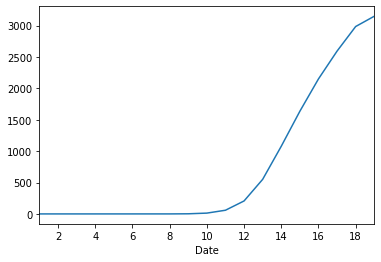

In [162]:
cases_perweek_cold['Mean_Cases_Cold'].plot()

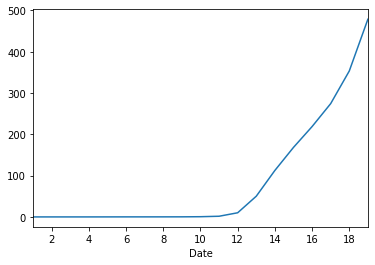

In [164]:
cases_perweek_warm['Mean_Cases_Hot'].plot()

In [160]:
#hot_cold_mean_merged.plot(kind='line',x='state',y='deaths Per Capita',ax=ax)

hot_cold_mean_merged = cases_perweek_warm[['Mean_Cases_Hot']]
hot_cold_mean_merged['Mean_Cases_Cold'] = cases_perweek_cold[['Mean_Cases_Cold']]
#hot_cold_mean_merged['Week'] = cases_perweek_warm[['Date']]
hot_cold_mean_merged['Week_No.'] = hot_cold_mean_merged.index
hot_cold_mean_merged

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mean_Cases_Hot,Mean_Cases_Cold,Week_No.
Date,,,
1,0.000000,0.000000,1
2,0.000000,0.000000,2
3,0.000000,0.000000,3
4,0.005600,0.001429,4
5,0.050429,0.026571,5
6,0.099714,0.058114,6
7,0.113143,0.089086,7
8,0.134457,0.144914,8
9,0.201229,2.012971,9


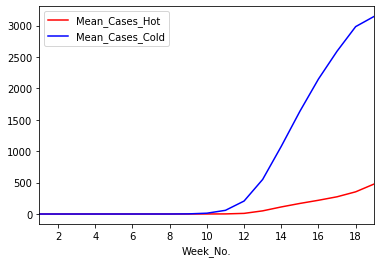

In [165]:
#Plotting Mean number of cases per week per capita for variable hot country and cold country
ax = plt.gca()

hot_cold_mean_merged.plot(kind='line',x='Week_No.',y='Mean_Cases_Hot',color='red', ax=ax)
hot_cold_mean_merged.plot(kind='line',x='Week_No.',y='Mean_Cases_Cold', color='blue', ax=ax)
    
plt.show()

### Observations:
#### The correlation between the spread of virus and temperature is not limited to the United States locally but it is also a global phenomenon as observed from the plot and our findings. The spread of corono virus seems to be more rampant in colder countries with higher number of cases per capita as compared to hoter countries